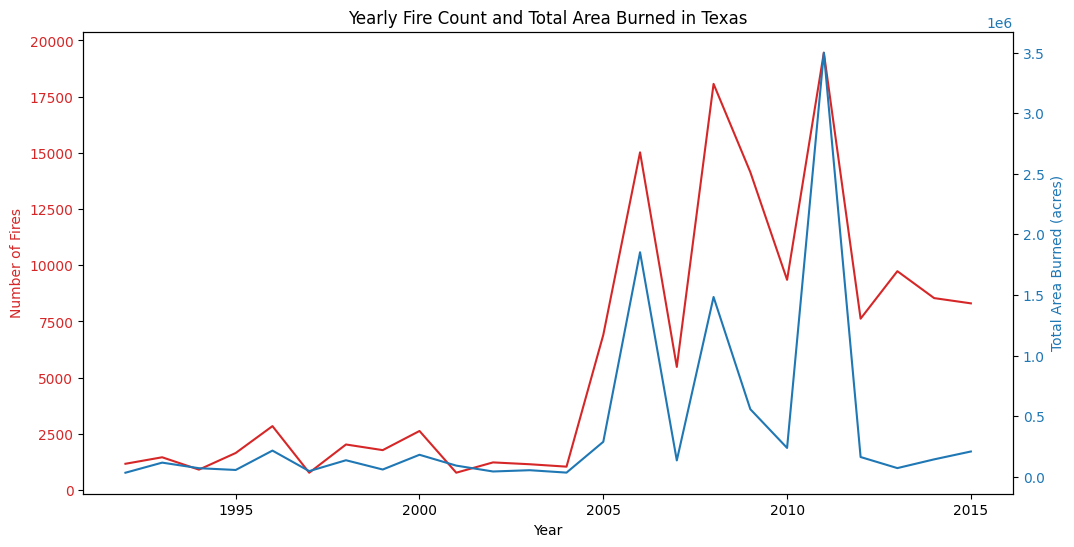

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load fire data
df = pd.read_csv('../dataset/texas_fires.csv')

df['DISCOVERY_DATE_NEW'] = pd.to_datetime(df['DISCOVERY_DATE_NEW'])

df['Month'] = df['DISCOVERY_DATE_NEW'].dt.month
df['Year'] = df['DISCOVERY_DATE_NEW'].dt.year

yearly_fires = df.groupby('Year').size().reset_index(name='Fire_Count')
yearly_area = df.groupby('Year')['FIRE_SIZE'].sum().reset_index(name='Total_Area')
monthly_fires = df.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')
monthly_area = df.groupby(['Year', 'Month'])['FIRE_SIZE'].sum().reset_index(name='Total_Area')

fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fires', color=color)
ax1.plot(yearly_fires['Year'], yearly_fires['Fire_Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Area Burned (acres)', color=color)
ax2.plot(yearly_area['Year'], yearly_area['Total_Area'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Yearly Fire Count and Total Area Burned in Texas')
plt.show()


<Axes: xlabel='Year', ylabel='Fire_Count'>

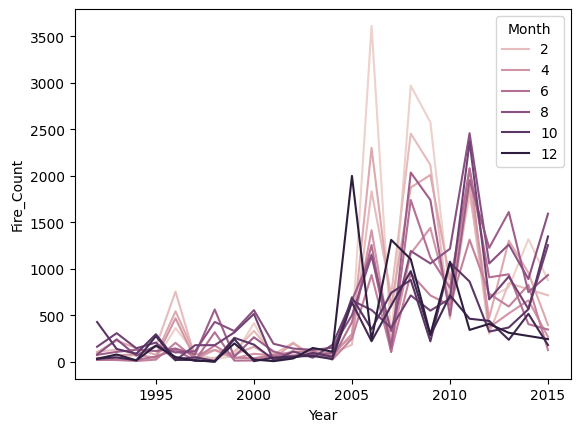

In [2]:
sns.lineplot(data=monthly_fires, x='Year', y='Fire_Count', hue='Month')


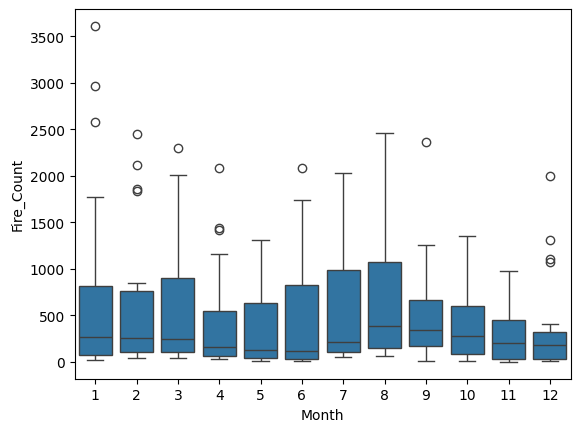

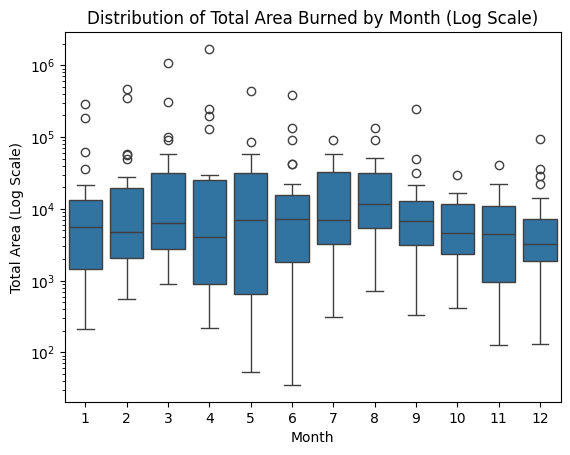

In [3]:
sns.boxplot(data=monthly_fires, x='Month', y='Fire_Count')

plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=monthly_area, x='Month', y='Total_Area')

plt.yscale('log')

plt.title('Distribution of Total Area Burned by Month (Log Scale)')
plt.xlabel('Month')
plt.ylabel('Total Area (Log Scale)')

plt.show()


In [4]:
df = pd.read_csv('../dataset/texas_fires_with_fips.csv')

In [5]:
texas_fires_with_drought_and_fips = pd.read_csv('../dataset/texas_fires_drought.csv')

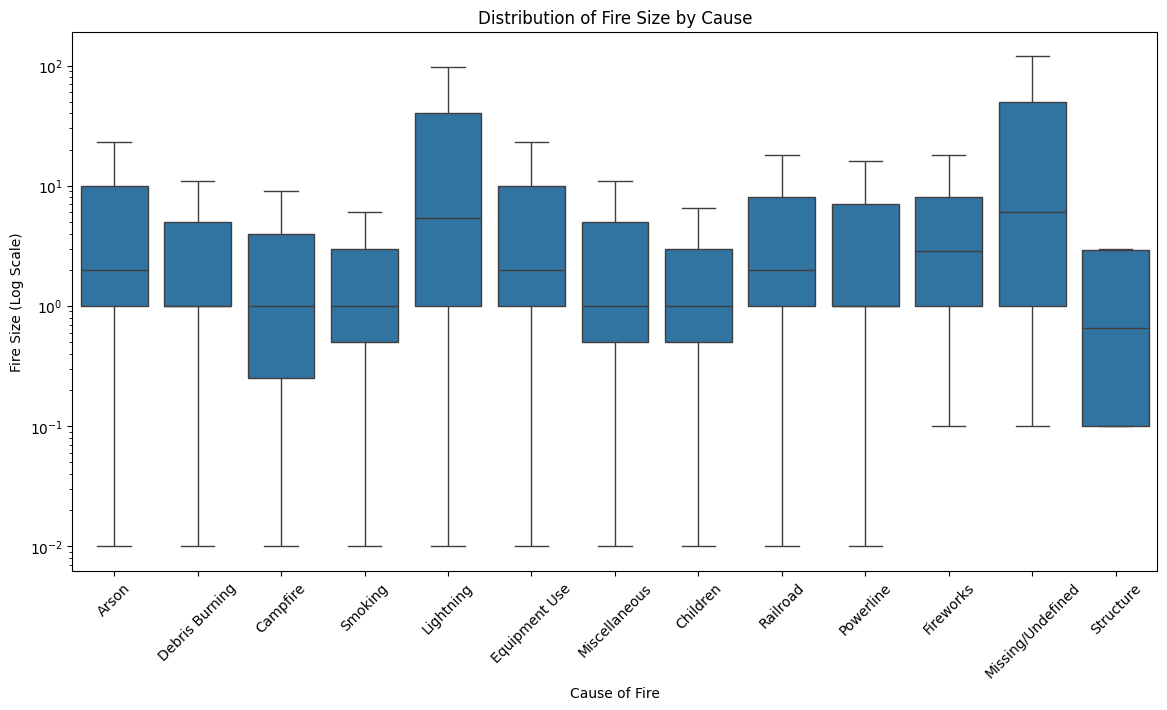

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of fire size by cause
plt.figure(figsize=(14, 7))
sns.boxplot(data=texas_fires_with_drought_and_fips, x='STAT_CAUSE_DESCR', y='FIRE_SIZE', showfliers=False)
plt.yscale('log')  # Use log scale for fire size
plt.xticks(rotation=45)
plt.title('Distribution of Fire Size by Cause')
plt.xlabel('Cause of Fire')
plt.ylabel('Fire Size (Log Scale)')
plt.show()


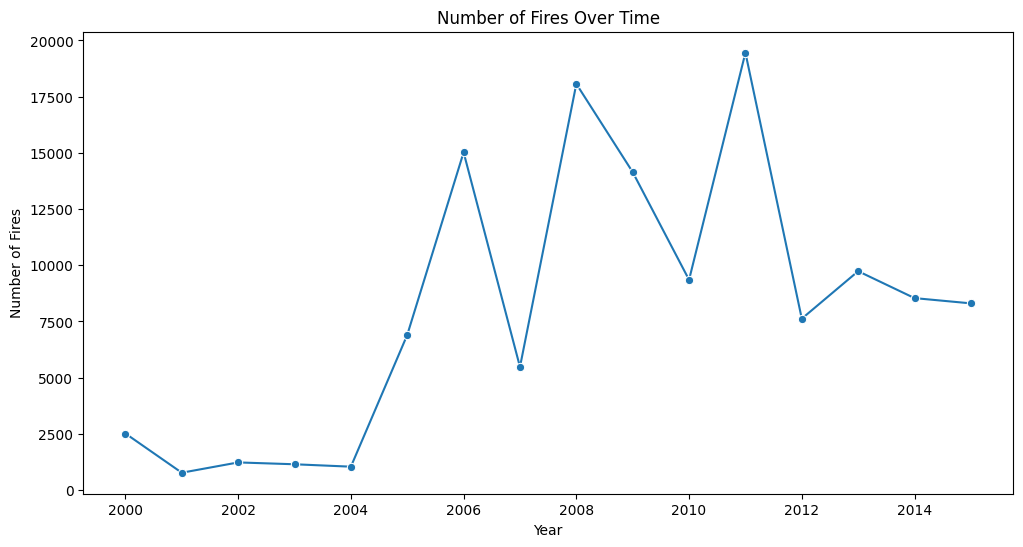

In [7]:
# Group by year and count fires
yearly_fires = texas_fires_with_drought_and_fips.groupby('FIRE_YEAR').size().reset_index(name='Fire_Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_fires, x='FIRE_YEAR', y='Fire_Count', marker='o')
plt.title('Number of Fires Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()


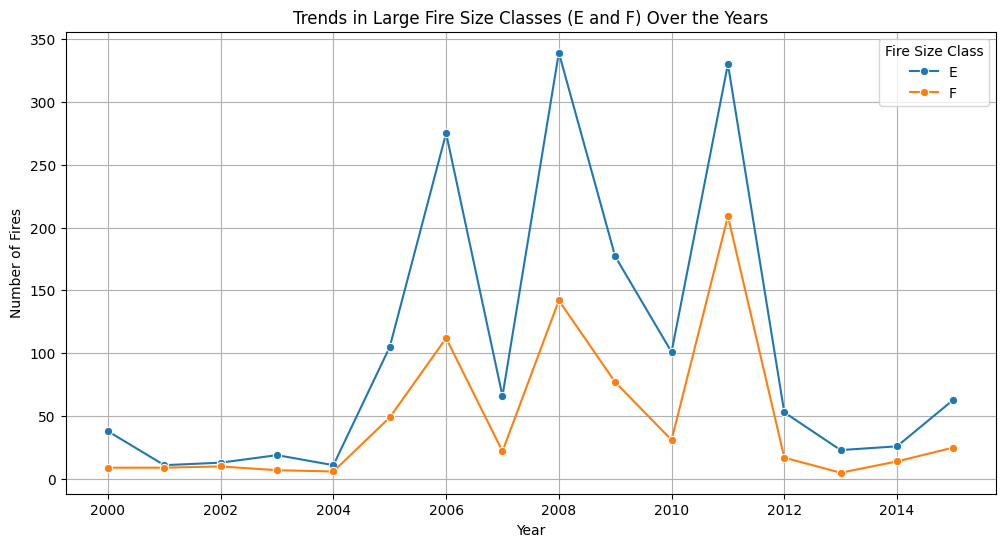

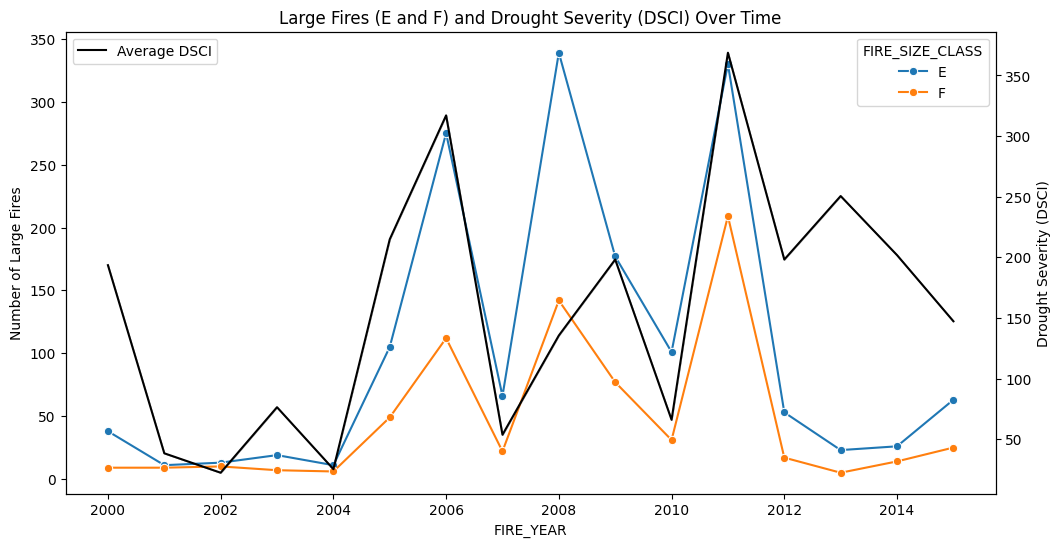

In [8]:
# Filter for larger fire size classes (E and F, based on size)
large_fires = texas_fires_with_drought_and_fips[texas_fires_with_drought_and_fips['FIRE_SIZE_CLASS'].isin(['E', 'F'])]

# Group by year and fire size class
large_fires_by_year = large_fires.groupby(['FIRE_YEAR', 'FIRE_SIZE_CLASS']).size().reset_index(name='Fire_Count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=large_fires_by_year, x='FIRE_YEAR', y='Fire_Count', hue='FIRE_SIZE_CLASS', marker='o')
plt.title('Trends in Large Fire Size Classes (E and F) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(title='Fire Size Class')
plt.grid(True)
plt.show()


# Group by year and calculate mean DSCI
drought_by_year = texas_fires_with_drought_and_fips.groupby('FIRE_YEAR')['DSCI'].mean().reset_index()

# Merge large fires and drought data
large_fires_with_drought = pd.merge(large_fires_by_year, drought_by_year, on='FIRE_YEAR')

# Plot with two y-axes (one for fire count, one for drought severity)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Fire count plot
sns.lineplot(data=large_fires_with_drought, x='FIRE_YEAR', y='Fire_Count', hue='FIRE_SIZE_CLASS', marker='o', ax=ax1)
ax1.set_ylabel('Number of Large Fires')
ax1.set_title('Large Fires (E and F) and Drought Severity (DSCI) Over Time')

# Drought severity plot on secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=large_fires_with_drought, x='FIRE_YEAR', y='DSCI', color='black', ax=ax2, label='Average DSCI')
ax2.set_ylabel('Drought Severity (DSCI)')

plt.legend(loc='upper left')
plt.show()


In [9]:
#Show earliest measured date
print(df['DISCOVERY_DATE_NEW'].min())

1992-01-01


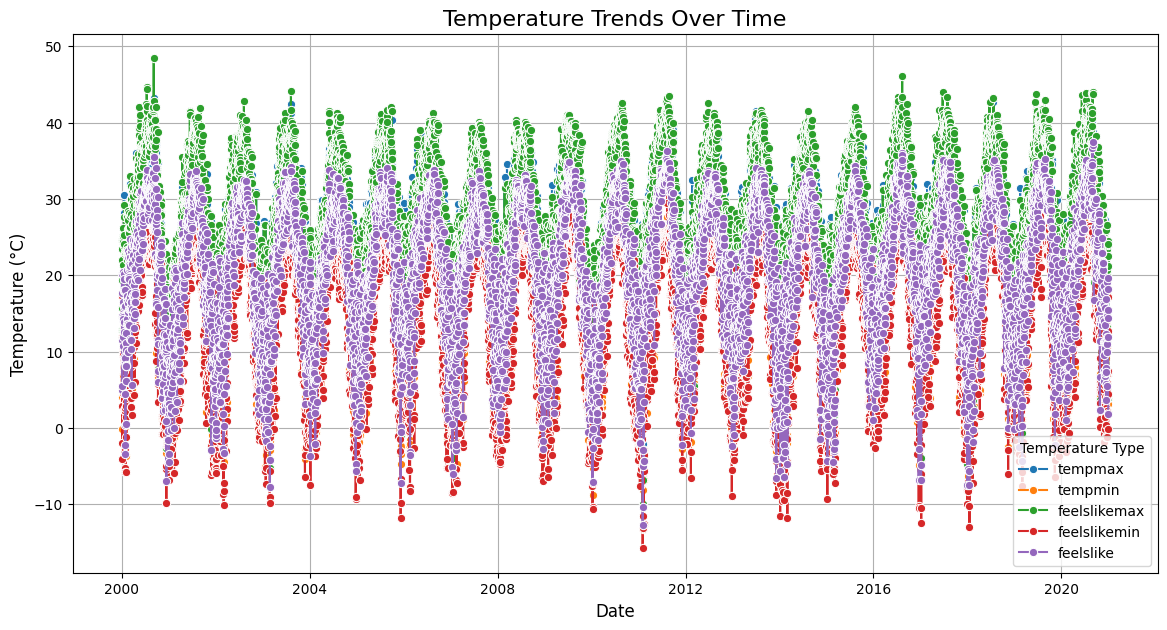

In [10]:
import pandas as pd

combined_df = pd.read_csv('../cleaned_texas_weather_data_metric2.csv')
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'], errors='coerce')
combined_df = combined_df.dropna(subset=['datetime'])
combined_df = combined_df.sort_values(by='datetime').reset_index(drop=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Select temperature columns
temp_columns = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike']

# Melt the dataframe to plot all temperature columns together
temp_data = combined_df[['datetime'] + temp_columns].melt(id_vars=['datetime'], 
                                                           var_name='Temperature_Type', 
                                                           value_name='Temperature')

# Plot the temperatures over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=temp_data, x='datetime', y='Temperature', hue='Temperature_Type', marker='o')

# Customize the plot
plt.title('Temperature Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(title='Temperature Type', fontsize=10)
plt.grid(True)

# Show the plot
plt.show()




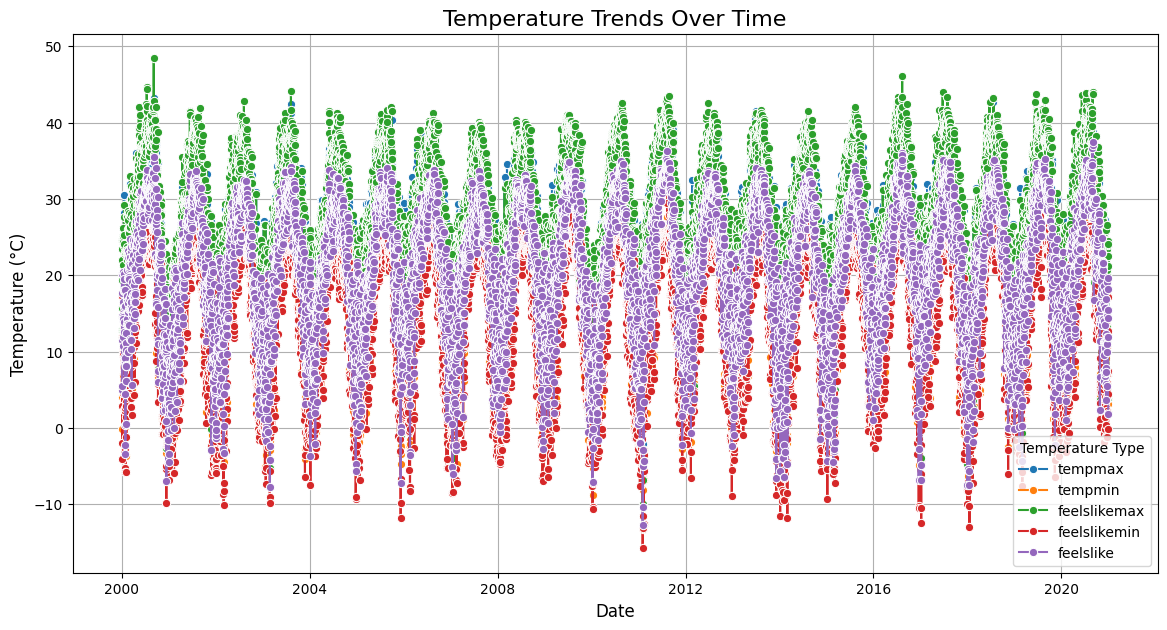

In [12]:
import pandas as pd

combined_df = pd.read_csv('../cleaned_texas_weather_data_metric2.csv')
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'], errors='coerce')
combined_df = combined_df.dropna(subset=['datetime'])
combined_df = combined_df.sort_values(by='datetime').reset_index(drop=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Select temperature columns
temp_columns = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike']

# Melt the dataframe to plot all temperature columns together
temp_data = combined_df[['datetime'] + temp_columns].melt(id_vars=['datetime'], 
                                                           var_name='Temperature_Type', 
                                                           value_name='Temperature')

# Plot the temperatures over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=temp_data, x='datetime', y='Temperature', hue='Temperature_Type', marker='o')

# Customize the plot
plt.title('Temperature Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(title='Temperature Type', fontsize=10)
plt.grid(True)

# Show the plot
plt.show()